# 유럽 축구선수 분석

### 부제 - Manchester United에는 어떤 유형의 선수가 필요한가

#### 러닝스푼즈 : 이인섭

# Introduction

2013년 5월 8일 Manchester United의 감독이자 유럽 축구의 한 획을 그은 Alex Ferguson감독이 은퇴를 하였다. Manchester United는 Alex Ferguson감독이 은퇴를 하고 당시 타팀에서 감독을 하던 데이비드 모이스감독을 선임 하였지만 거짓말처럼 하락세를 타며 팀의 명성에 걸맞지 않은 순위로 시즌을 끝냈다. 그 후 데이비드 모이스감독이 나간 후 루이 반 할, 조세 무리뉴등 세계적인 감독이 Manchester United의 지휘봉을 맡았으나 Manchester United는 Alex Ferguson감독이 지휘했던 시절의 위상을 되찾지 못했다. 이러한 사건들을 겪은 Manchester United는 Alex Ferguson감독이 지휘를 했던 당시 선수였던 올레 군나르 솔샤르 감독을 부임시키는 특단의 조취를 내놓았고, 2020년 3월 기준 올레 군나르 솔샤르감독은 2019/2020시즌 겨울시장에서 단 두명의 선수를 영입하며 Manchester United의 분위기를 반전시키는데 성공한다.

그렇다면, Manchester United의 분위기를 반전시킨 단 두명의 선수는 어떤 선수일까, 그 두명의 선수가 있었기에 Manchester United가 반전에 성공한 것일까? 

문제가 해결되기 전인 2018/2019 FIFA데이터를 통해 Manchester United팀을 분석하고 해외 유럽 축구선수 중에 Manchester United에 필요한 유형인 선수를 발굴하고 현재 올레 군나르 솔샤르 감독이 영입한 선수와 비교해보자.

---------------------------------------------------------------------------------------------------------------------------------

# 1. 데이터 수집

## a. 데이터 불러오기

In [1]:
# csv 데이터파일을 불러오기 위하여 앞에서 배운 pandas 라이브러리를 불러옵니다.
import pandas as pd

In [2]:
# 우리가 분석해야할 데이터를 불러와보겠습니다.
data = pd.read_csv('./data/FIFA_data.csv')

In [3]:
# 불러온 데이터를 확인해 봅시다.
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# head함수 실행시 왼쪽 하단에 row의 개수와 컬럼의 개수가 보이는걸 확인할 수 있습니다.
# 현재 데이터의 컬럼의 개수는 80개로 확인되지만, 화면상에 보이는 컬럼의 개수는 20개로 확인이 됩니다.
# head함수 실행시 볼 수 있는 컬럼의 최대 개수를 증가시키는 함수를 실행시킵니다.
pd.set_option('display.max_columns', 80)

In [5]:
# 보여지는 컬럼의 최대개수가 80개로 증가하였는지 확인해 봅시다.
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## b. 데이터 확인 후, 분석 계획 설립하기

In [6]:
# 데이터 불러오기를 완료 하였으면, 각 컬럼들의 의미를 살펴보아야 겠죠? 각 컬럼의 의미를 정리해봅시다.

# 저는 정리 방법으로 Jupyter Notebook에서 제공하는 마크다운을 이용하겠습니다

# Tip : 마크다운 내에서 표를 그리는 방법
# | 컬럼의 분류1 | 컬럼의 분류2 | 컬럼의 분류3 |
# |-------------|--------------|---------------|
# |내용1 | 내용2 | 내용3 |

| 컬럼 명 |  컬럼 의미 |
|--------|-----------|
| ID | 고유의 번호 |
| Name | 이름 |
| Age | 나이 |
| Overall | 현재 능력치 |
| Potential | 잠재 능력치 |
| Club | 소속 팀 |
| Value | 예상 이적료 (유로) |
| Wage | 주급 (유로)|
| Preferred Foot | 잘 사용하는 발 |
| Weak Foot | 잘 사용하지 않는 발 |
| Skill Moves | 개인기 |
| Position | 포지션 |
| Jersey Number | 등번호 |
| Joined | 소속 팀 입단 날짜 |
| Contract Valid Until | 계약 기간 |
| Height | 키 (피트) |
| Weight | 몸무게 (파운드) |
| LS ~ RB | 포지션 별 능력치 |
| Crossing ~ GKReflexes | 세부 능력치 |
| Release Clause | 바이아웃 |


### 해당 컬럼들을 이용해서 어떻게 주제에 맞게 분석을 할지 고민

#### 분석 순서
- 1. Manchester United의 선수들을 분석
- 2. Manchester United의 지역 라이벌  Manchester City선수와 능력치 비교
- 3. 부족한 포지션 2개 선택
- 4. 다른팀의 선수 중  Manchester United의 재정, 현실가능성, 영입방침을 고려하여 2명의 선수를 영입

--------------------------------------------------------------------------------------------------------------------------
# 2. Manchester United 분석 - Manchester United는 어떤 선수들이 존재하는가?
## a. EDA

In [7]:
# 현재 데이터는 모든 축구선수들의 데이터가 존재하므로 Manchester United의 선수들만 추출하여 데이터를 만들어 봅시다.
mu = data[data['Club'] == 'Manchester United'] # 데이터프레임 안에 추출하고 싶은 특성을 입력하면 해당 특성을 가진 데이터만 추출됩니다.

### `df.unique()`
함수 사용 시 Club이란 컬럼의 유니크한 값들을 볼 수 있습니다.

- Manchester United선수만 잘 추출되었는지 비교하기 위하여 전의 데이터와 비교

In [8]:
# 데이터가 잘 추출되었는지 확인해 봅시다.
mu['Club'].unique()

array(['Manchester United'], dtype=object)

In [9]:
data['Club'].unique() # 전의 데이터와 비교해 봅시다.

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [10]:
# 자 그러면, mu데이터에는 Manchester United의 선수들만 추출된 것을 확인하였으니, print()함수를 이용해 간략한 정보를 살펴봅시다.

print(f"인원 : {mu.shape[0]}\n")
print(f"맨유 선수들의 포지션 : {mu['Position'].unique()}\n")
print(f"평균 능력치 : {mu['Overall'].mean()} \n")
print(f"평균 잠재 능력치 : {mu['Potential'].mean()}\n")

인원 : 33

맨유 선수들의 포지션 : ['GK' 'RDM' 'ST' 'RW' 'LW' 'CDM' 'RM' 'CM' 'CAM' 'CB' 'RCB' 'LB' 'RB']

평균 능력치 : 80.18181818181819 

평균 잠재 능력치 : 82.81818181818181



`sns.countplot(data)`

data의 개수를 계산하여 그래프로 그려주는 함수 입니다.

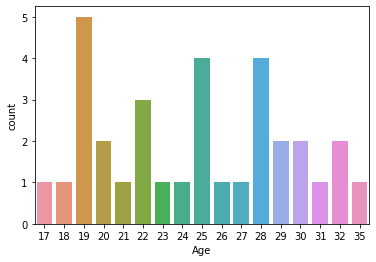

In [11]:
import seaborn as sns
# Manchester United의 나이대, 포지션은 어떻게 구성되어 있는지 살펴봅시다.
sns.countplot(mu['Age'])

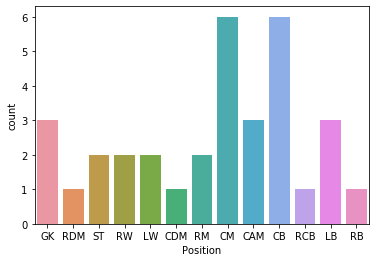

In [12]:
# 포지션의 구성을 봅시다.
sns.countplot(mu['Position'])

In [13]:
mu.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10457,240513,E. Hamilton,19,Scotland,65.0,78.0,Manchester United,€1M,€11K,Left,1.0,3.0,3.0,CM,48.0,"Jul 1, 2015",2020,6'1,165lbs,62+2,62+2,62+2,61+2,62+2,62+2,62+2,61+2,63+2,63+2,63+2,61+2,63+2,63+2,63+2,61+2,59+2,62+2,62+2,62+2,59+2,59+2,60+2,60+2,60+2,59+2,57.0,58.0,64.0,69.0,52.0,61.0,54.0,50.0,64.0,65.0,60.0,55.0,62.0,61.0,60.0,70.0,61.0,66.0,68.0,68.0,70.0,59.0,59.0,63.0,51.0,54.0,57.0,54.0,53.0,7.0,11.0,5.0,9.0,11.0,€2.5M
10461,237698,C. Gribbin,19,England,65.0,80.0,Manchester United,€1.2M,€11K,Left,1.0,3.0,3.0,CAM,42.0,"Jul 27, 2015",2019,6'0,159lbs,61+2,61+2,61+2,64+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,61+2,61+2,61+2,64+2,54+2,51+2,51+2,51+2,54+2,51+2,45+2,45+2,45+2,51+2,62.0,54.0,54.0,66.0,44.0,69.0,64.0,72.0,63.0,67.0,70.0,68.0,62.0,60.0,66.0,65.0,54.0,65.0,60.0,62.0,50.0,42.0,62.0,64.0,56.0,58.0,22.0,35.0,40.0,7.0,11.0,12.0,7.0,14.0,€2.9M
11081,225557,R. Poole,20,Wales,75.0,80.0,Manchester United,€675K,€13K,Right,1.0,3.0,2.0,CB,50.0,"Sep 1, 2015",2019,5'11,163lbs,48+2,48+2,48+2,51+2,51+2,51+2,51+2,51+2,53+2,53+2,53+2,54+2,56+2,56+2,56+2,54+2,58+2,61+2,61+2,61+2,58+2,59+2,62+2,62+2,62+2,59+2,34.0,28.0,60.0,64.0,25.0,55.0,40.0,30.0,62.0,61.0,70.0,65.0,69.0,57.0,70.0,32.0,78.0,71.0,70.0,32.0,65.0,57.0,44.0,47.0,37.0,55.0,61.0,64.0,61.0,16.0,15.0,13.0,7.0,12.0,€1.4M
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M
12545,240510,J. Bohui,19,England,63.0,76.0,Manchester United,€700K,€10K,Right,1.0,3.0,3.0,ST,46.0,"Aug 7, 2016",2019,5'9,165lbs,61+2,61+2,61+2,62+2,62+2,62+2,62+2,62+2,61+2,61+2,61+2,60+2,52+2,52+2,52+2,60+2,44+2,41+2,41+2,41+2,44+2,41+2,37+2,37+2,37+2,41+2,45.0,62.0,51.0,58.0,48.0,62.0,48.0,42.0,35.0,65.0,75.0,78.0,71.0,59.0,73.0,59.0,66.0,62.0,64.0,59.0,66.0,21.0,64.0,57.0,64.0,57.0,20.0,16.0,16.0,9.0,7.0,10.0,13.0,11.0,€1.7M


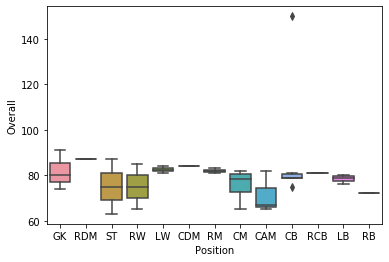

In [14]:
# Manchester United의 선수에 대한 정보를 확인하였으면, 데이터도 확인해 봅시다.
# 먼저, 이상치를 찾아 보도록 하겠습니다.
# 이상치를 찾는 방법중 가장 대표적인 Box Plot을 이용합니다. 
# 앞서 배운 seaborn의 boxplot을 사용해보겠습니다.

import seaborn as sns

sns.boxplot(data = mu, x = 'Position', y = 'Overall') # 포지션별 현재 능력치에 대한 Box Plot입니다.
# Position CB쪽에 이상치가 두개 발견되는데 아래쪽 이상치는 위쪽 이상치에 영향을 받아 이상치 처럼 보이는 것 일 수 있습니다. 주의!

### 이상치 처리

- PPT 설명

In [15]:
# 나이가 19살임에도 Overall이 150인것을 확인하였으면, 어떻게 처리할지 생각해 봅시다.
mu[mu['Overall'] > 100] 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M


In [16]:
# 같은 포지션의 선수를 살펴보니, CB포지션의 점수가 같으면, Overall이 같은 것을 볼 수 있습니다.
mu[mu['Position'] == 'CB'][['Overall','CB']] 

,Overall,CB
327,81.0,80+2
584,79.0,77+2
629,79.0,78+3
654,79.0,78+2
11081,75.0,62+2
11422,150.0,62+2


In [17]:
mu['Overall'][11422] = 75

C:\Users\jin03\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jin03\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


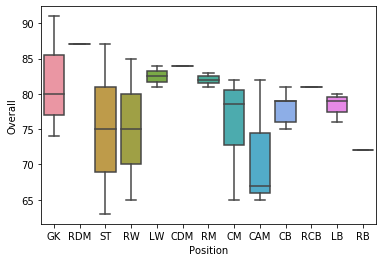

In [18]:
# 다시 한 번, 그래프를 살펴보면 이상치가 두개 모두 사라진 것을 알 수 있습니다.
# 여기서 알 수 있는것은 위쪽 이상치가 정상적인 수치가 이상치처럼 보이도록 영향을 줬다는 것 입니다.
sns.boxplot(data = mu, x = 'Position', y = 'Overall')

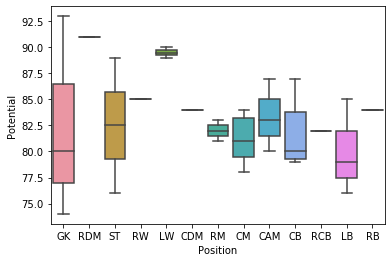

In [19]:
# 다른 능력치도 마찬가지로 이상치를 확인해보시기 바랍니다.
sns.boxplot(data = mu, x = 'Position', y = 'Potential')

### 결측치 찾기

- PPT 설명

In [20]:
mu.info() # 앞서배운 info함수를 통해 각 컬럼의 결측치의 개수를 확인해봅시다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

In [21]:
# LS ~ RB 까지 결측치 1개가 보입니다. 원인을 찾아봅시다.
mu[mu.isnull()['LS']] # 포지션이 GK인 선수는 다른 포지션들의 값이 비어있는 것을 확인할 수 있습니다.

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
526,173373,S. Romero,31,Argentina,80.0,80.0,Manchester United,€9M,€91K,Right,3.0,3.0,1.0,GK,1.0,"Jul 27, 2015",2021,6'4,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,14.0,12.0,39.0,17.0,12.0,12.0,13.0,48.0,40.0,47.0,44.0,52.0,78.0,44.0,14.0,63.0,35.0,75.0,11.0,33.0,21.0,11.0,55.0,16.0,62.0,14.0,11.0,15.0,78.0,76.0,81.0,77.0,82.0,€16.7M
2561,53739,L. Grant,35,England,74.0,74.0,Manchester United,€1.3M,€39K,Right,1.0,4.0,1.0,GK,13.0,"Jul 3, 2018",2020,6'4,183lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,17.0,14.0,43.0,15.0,11.0,17.0,19.0,40.0,34.0,52.0,46.0,56.0,69.0,56.0,24.0,73.0,39.0,71.0,19.0,42.0,26.0,14.0,50.0,20.0,60.0,12.0,13.0,19.0,74.0,72.0,74.0,74.0,76.0,€2.5M


In [22]:
# 포지션이 GK인 선수는 다른 포지션에 대한 능력치를 부여할 필요가 없기에 NaN으로 채워진 것으로 보입니다.
# NaN값을 측정할 수 없다는 의미의 -1로 교체합니다.
mu = mu.fillna(-1)

In [23]:
# 결칙치가 잘 대체되었는지 확인해봅시다.
mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

# 3. Manchester United는 어떤 포지션을 보강해야 할까?

## a. 전처리


이상치와 결측치를 처리하였으니 다음 분석 단계인 Manchester United의 지역 라이벌  Manchester City선수와 능력치 비교하기 위해서 필요한 전처리들을 진행해보겠습니다.

    PS. 전처리와 EDA는 계속 왔다갔다 하며, 순서를 반복해야 합니다. 그 이유는 앞서 실행하신 것 처럼 이상치 찾기 -> EDA, 이상치 대체 -> 전처리 결치 찾기 -> EDA에 해당하기에 두가지 단계의 순서를 반복해야 하며, 저는 수업을 위하여 전처리 설명을 뒤로 따로 빼두었습니다.
    
- PPT 설명

In [24]:
# Manchester City선수와 능력치 비교를 하기 위해 MU, MC선수가 담긴 데이터를 만듭니다.
df = data[(data['Club']=='Manchester United') | (data['Club'] == 'Manchester City')]

In [25]:
df['Club'].unique()

array(['Manchester United', 'Manchester City'], dtype=object)

In [26]:
# 데이터를 보시면 Value의 타입이 str로 되어있는 것을 확인할 수 있습니다.
df['Value'] # 또한 우리가 보기 쉬운 원화가 아닌 유로로 되어있기에 이것을 한화로 바꾸어 줍시다.

3          €72M
4         €102M
13         €60M
23       €64.5M
45         €64M
          ...  
14197     €525K
14511     €450K
15210     €400K
16403     €210K
17451     €120K
Name: Value, Length: 66, dtype: object

### 2020. 03월 기준 1유로 = 1,358원
### 1M = 1,000,000
### 1K = 1,000

In [27]:
import warnings

warnings.filterwarnings(action='ignore') # 경고표시 제거

In [28]:
df['Value'] = df['Value'].str.replace('M', '000000') # M은 000000으로 대체
df['Value'] = df['Value'].str.replace('K', '000') # K는 000으로 대체

In [29]:
df['Value'] = df['Value'].str.slice(1,) # 맨 앞 유로표시 제거

In [30]:
df['Value'] = df['Value'].str.replace('.', '') # 소숫점 자리 제거

In [31]:
df['Value'] = df['Value'].astype(int) # int형으로 변경

In [32]:
# 선수들의 Value값이 원화로 변경된 것을 확인할 수 있습니다.
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,102000000,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000,€285K,Left,4.0,2.0,4.0,LCM,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,645000000,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M


In [33]:
# MU선수들과 MC선수들을 분리하여 줍시다.
mu = df[df['Club'] == 'Manchester United']
mc = df[df['Club'] == 'Manchester City']

### 주전선수 비교를 위하여 MU주전과 MC주전을 선발

- GK : 1명, CB : 4명 MF : 4명 ST : 2명을 선발
- 선발의 기준은 현재능력치
- GK 리스트 = GK
- CB 리스트 = CB, LCB, RCB, RB, LB
- MF 리스트 = RCM, LCM, RDM, CDM, CM, RM, CAM
- ST 리스트 = ST, LW, RW

In [34]:
mu

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,625000000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
93,184941,A. Sánchez,29,Chile,85.0,85.0,Manchester United,375000000,€215K,Right,4.0,3.0,4.0,RW,7.0,"Jan 22, 2018",2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,77+3,77+3,82+3,65+3,64+3,64+3,64+3,65+3,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
116,211300,A. Martial,22,France,84.0,90.0,Manchester United,425000000,€165K,Right,3.0,3.0,4.0,LW,11.0,"Sep 1, 2015",2019,6'0,168lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,80+3,80+3,80+3,81+3,73+3,73+3,73+3,81+3,64+3,60+3,60+3,60+3,64+3,61+3,54+3,54+3,54+3,61+3,76.0,84.0,69.0,77.0,74.0,87.0,84.0,54.0,60.0,86.0,88.0,89.0,85.0,81.0,81.0,84.0,74.0,75.0,75.0,80.0,58.0,42.0,83.0,73.0,81.0,79.0,38.0,39.0,36.0,9.0,8.0,8.0,15.0,11.0,€87.1M
132,191202,N. Matić,29,Serbia,84.0,84.0,Manchester United,24000000,€165K,Left,3.0,3.0,3.0,CDM,31.0,"Jul 31, 2017",2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,79+3,79+3,74+3,78+3,82+3,82+3,82+3,78+3,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
211,178088,Juan Mata,30,Spain,83.0,83.0,Manchester United,245000000,€160K,Left,3.0,3.0,4.0,RM,8.0,"Jan 25, 2014",2019,5'7,139lbs,74+3,74+3,74+3,80+3,80+3,80+3,80+3,80+3,82+3,82+3,82+3,80+3,77+3,77+3,77+3,80+3,61+3,60+3,60+3,60+3,61+3,56+3,46+3,46+3,46+3,56+3,83.0,78.0,56.0,85.0,71.0,82.0,84.0,86.0,79.0,88.0,69.0,62.0,84.0,85.0,89.0,75.0,70.0,71.0,37.0,72.0,50.0,39.0,83.0,85.0,81.0,87.0,42.0,31.0,21.0,9.0,10.0,14.0,5.0,8.0,€45.3M
250,209297,Fred,25,Brazil,82.0,84.0,Manchester United,265000000,€140K,Left,1.0,4.0,4.0,CM,17.0,"Jun 21, 2018",2023,5'7,141lbs,74+2,74+2,74+2,77+2,77+2,77+2,77+2,77+2,79+2,79+2,79+2,78+2,80+2,80+2,80+2,78+2,78+2,79+2,79+2,79+2,78+2,77+2,73+2,73+2,73+2,77+2,67.0,74.0,55.0,85.0,70.0,79.0,70.0,72.0,80.0,86.0,77.0,79.0,84.0,82.0,87.0,76.0,8

In [35]:
# 각 포지션 별 리스트 작성
gk_list = ['GK'] 
cb_list = ['CB', 'LCB', 'RCB', 'RB', 'LB']
mf_list = ['RCM', 'LCM', 'RDM', 'CDM', 'CM', 'RM', 'CAM']
st_list = ['ST', 'LW', 'RW']


In [36]:
# 각 포지션별 남은 자리 숫자를 입력해준다.
st_count = 2 
mf_count = 4
cb_count = 4
gk_count = 1

mu_id = []

for index in mu.index :
    if mu['Position'][index] in gk_list :
        if gk_count != 0 :
            mu_id.append(mu['ID'][index])
            gk_count -= 1
    elif mu['Position'][index] in cb_list :
        if cb_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'CB'
            cb_count -= 1
    elif mu['Position'][index] in mf_list :
        if mf_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'MF'
            mf_count -= 1
    else :
        if st_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'ST'
            st_count -= 1

- `isin()`

괄호 안의 리스트에 속하는 값만 True로 반환

In [37]:
mu = mu[mu['ID'].isin(mu_id)] # 리스트 안에 있는 선수만 MU선수로 남긴다.

In [38]:
# 각 포지션별 남은 자리 숫자를 입력해준다.
st_count = 2 
mf_count = 4
cb_count = 4
gk_count = 1

mc_id = []

for index in mc.index :
    if mc['Position'][index] in gk_list :
        if gk_count != 0 :
            mc_id.append(mc['ID'][index])
            gk_count -= 1
    elif mc['Position'][index] in cb_list :
        if cb_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'CB'
            cb_count -= 1
    elif mc['Position'][index] in mf_list :
        if mf_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'MF'
            mf_count -= 1
    else :
        if st_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'ST'
            st_count -= 1

In [39]:
mc = mc[mc['ID'].isin(mc_id)] # 리스트 안에 있는 선수만 MC선수로 남긴다.

In [40]:
df = pd.concat([mu,mc]) # mu, mc 주전선수가 모인 데이터를 만든다.

## b. EDA

- 주전선수 비교

In [41]:
df.head(20)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,MF,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,625000000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
93,184941,A. Sánchez,29,Chile,85.0,85.0,Manchester United,375000000,€215K,Right,4.0,3.0,4.0,ST,7.0,"Jan 22, 2018",2022,5'7,163lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,82+3,77+3,77+3,77+3,82+3,65+3,64+3,64+3,64+3,65+3,62+3,57+3,57+3,57+3,62+3,77.0,80.0,73.0,77.0,83.0,87.0,79.0,78.0,75.0,86.0,86.0,79.0,90.0,83.0,87.0,84.0,87.0,83.0,72.0,81.0,79.0,46.0,84.0,82.0,77.0,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,€69.4M
132,191202,N. Matić,29,Serbia,84.0,84.0,Manchester United,24000000,€165K,Left,3.0,3.0,3.0,MF,31.0,"Jul 31, 2017",2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,79+3,79+3,74+3,78+3,82+3,82+3,82+3,78+3,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
211,178088,Juan Mata,30,Spain,83.0,83.0,Manchester United,245000000,€160K,Left,3.0,3.0,4.0,MF,8.0,"Jan 25, 2014",2019,5'7,139lbs,74+3,74+3,74+3,80+3,80+3,80+3,80+3,80+3,82+3,82+3,82+3,80+3,77+3,77+3,77+3,80+3,61+3,60+3,60+3,60+3,61+3,56+3,46+3,46+3,46+3,56+3,83.0,78.0,56.0,85.0,71.0,82.0,84.0,86.0,79.0,88.0,69.0,62.0,84.0,85.0,89.0,75.0,70.0,71.0,37.0,72.0,50.0,39.0,83.0,85.0,81.0,87.0,42.0,31.0,21.0,9.0,10.0,14.0,5.0,8.0,€45.3M
250,209297,Fred,25,Brazil,82.0,84.0,Manchester United,265000000,€140K,Left,1.0,4.0,4.0,MF,17.0,"Jun 21, 2018",2023,5'7,141lbs,74+2,74+2,74+2,77+2,77+2,77+2,77+2,77+2,79+2,79+2,79+2,78+2,80+2,80+2,80+2,78+2,78+2,79+2,79+2,79+2,78+2,77+2,73+2,73+2,73+2,77+2,67.0,74.0,55.0,85.0,70.0,79.0,70.0,72.0,80.0,86.0,77.0,79.0,84.0,82.0,87.0,76.0,83.0,87.0,61.0,76.0,73.0,80.0,69.0,76.0,65.0,82.0,76.0,78.0,69.0,7.0,16.0,15.0,11.0,15.0,€51M
327,225508,E. Bailly,24,Ivory Coast,81.0,87.0,Manchester United,21000000,€105K,Right,2.0,3.0,2.0,CB,2.0,"Jul 1, 2016",2020,6'1,170lbs,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,59+2,59+2,59+2,60+2,63+2,63+2,63+2,60+2,72+2,73+2,73+2,73+2,72+2,74+2,80+2,80+2,80+2,74+2,51.0,33.0,79.0,70.0,42.0,60.0,46.0,43.0,56.0,65.0,68.0,79.0,65.0,74.0,62.0,55.0,8

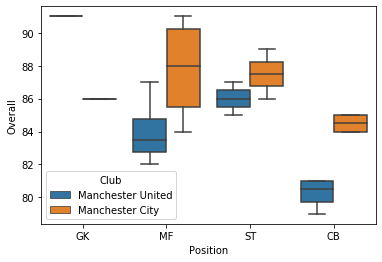

In [42]:
# 박스클폿은 이상치를 확인할 수 있을뿐 아니라 비교도 할 수 있습니다.
sns.boxplot(data=df, x='Position', y = 'Overall', hue = 'Club')

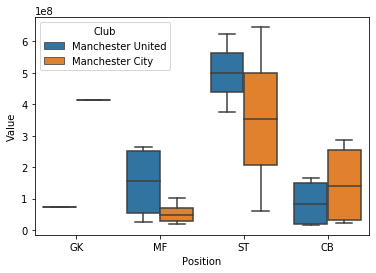

In [43]:
sns.boxplot(data=df, x='Position', y = 'Value', hue = 'Club')

MU선수와 MC선수를 비교해보면 이적료 대비 능력치가 떨어지는 포지션은 MF, CB인 것을 확인할 수 있다.

# 4. Manchester United는 어떤 선수를 영입해야 할까?

## a. EDA

- 필요 포지션의 어떤 선수를 대체해야할지 확인
- 기준은 영입일, 능력치, 잠재력, 나이

### 나만의 공식 만들기

- 잔류포인트 = (Overall * 2 + Potential) / Age 

In [44]:
mu['Point'] = (mu['Overall']*2 + mu['Potential']) / mu['Age']

In [45]:
mu[mu['Position']=='MF'][['Name','Overall','Potential','Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
45,P. Pogba,87.0,91.0,25,"Aug 9, 2016",10.600000
132,N. Matić,84.0,84.0,29,"Jul 31, 2017",8.689655
211,Juan Mata,83.0,83.0,30,"Jan 25, 2014",8.300000
250,Fred,82.0,84.0,25,"Jun 21, 2018",9.920000


In [46]:
mu[mu['Position']=='CB'][['Name','Overall','Potential','Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
327,E. Bailly,81.0,87.0,24,"Jul 1, 2016",10.375000
377,C. Smalling,81.0,82.0,28,"Jul 1, 2010",8.714286
454,L. Shaw,80.0,85.0,22,"Jun 27, 2014",11.136364
584,V. Lindelöf,79.0,85.0,23,"Jul 1, 2017",10.565217


#### 잔류포인트가 가장 낮은 Juan Mata, C. Smalling 방출 후 MF, CB한명씩 영입

## b. 시각화

- PPT 설명

지금까지의 EDA를 바탕으로 데려올 선수들의 능력치를 시각화합시다.

- Manchester United의 영입방칙은 최근 새로 부임한 솔샤르감독의 영입방침을 따릅니다.
- 선수의 나이는 어릴수록 좋음
- 잠재력 보다 현재 바로 주전으로 사용할 수 있는 선수
- 포지션은 마타와 스몰링의 상세포지션인 RM, CB를 따른다.


In [47]:
# RM, CB 포지션을 제외한 선수들을 제거합니다.
market = data[(data['Position']=='CB') | (data['Position']=='RM')]

`plt.subplots(행, 열, figsize=(가로, 세로))` 심화

여러개의 그래프를 한번에 그리기 위하여 설정해 줍니다.

이것을 변수 ax에 담는다면 ax[1, 1]은 1열 1행에 그래프가 그려집니다.

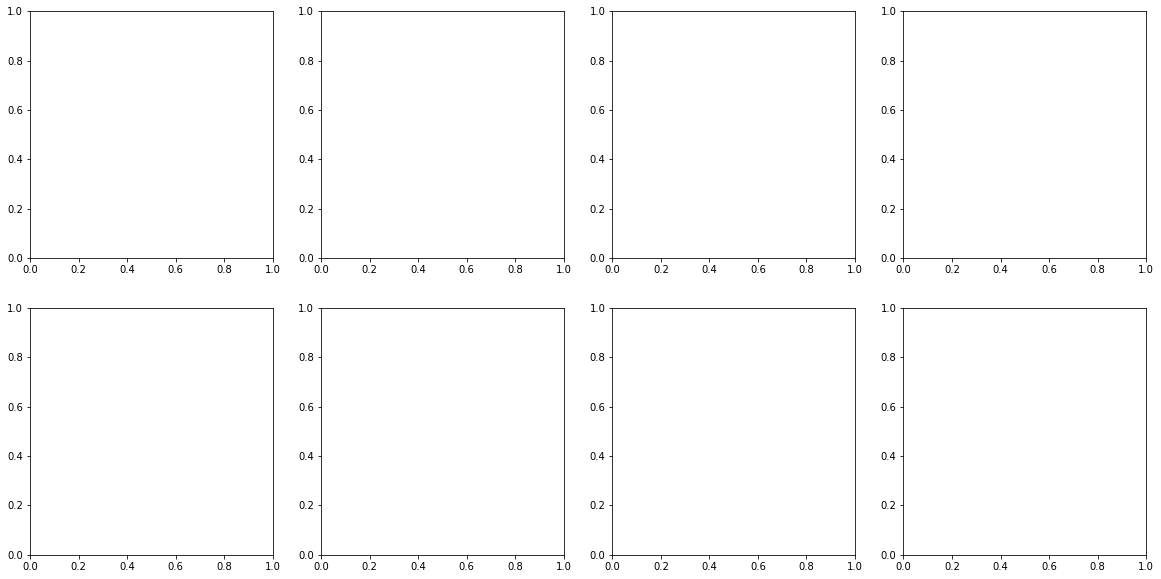

In [48]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,4, figsize=(20,10))

`plt.barplot(x, y, data, palette, ax)` 심화

앞에서 배운 barplot에서 색을 지정할 수 있는 palette와 어디에 그릴지 위치를 지정할 수 있는 ax도 배워봅시다.

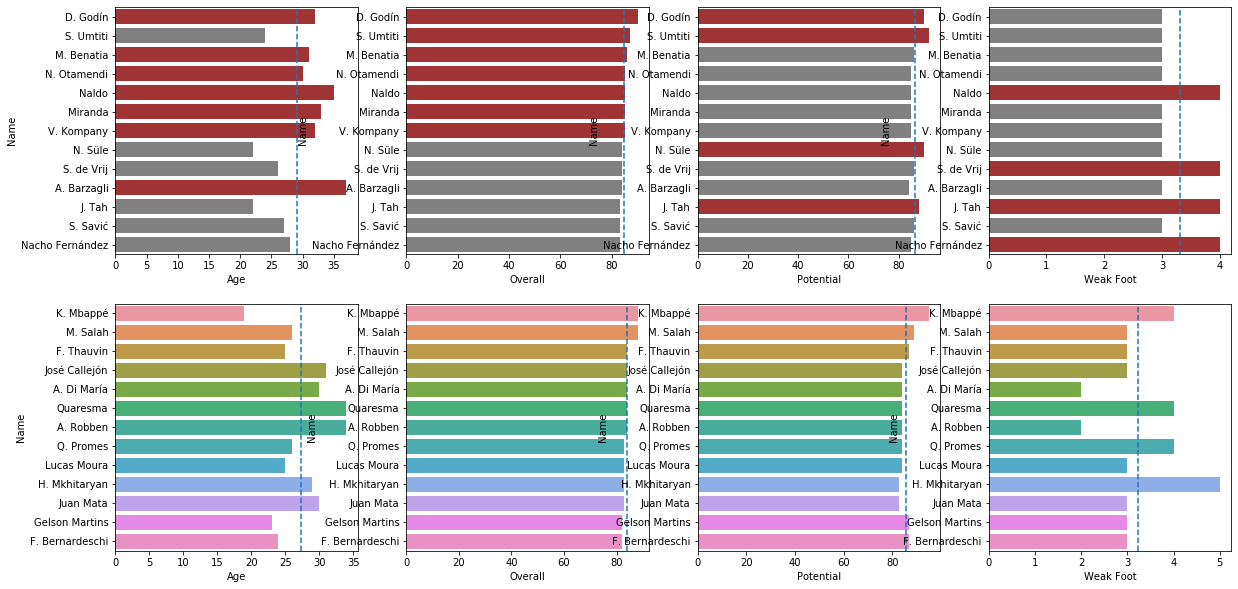

In [49]:
f, ax = plt.subplots(2,4, figsize=(20,10))

vs_list = ['Age', 'Overall', 'Potential', 'Weak Foot']

for i in range(8) :
    
    if i < 4 :
        colors = ['firebrick' if x > market[market['Position']=='CB'][:13][vs_list[i]].mean() else 'gray' for x in market[market['Position']=='CB'][:13][vs_list[i]]]
        
        sns.barplot(x= vs_list[i], y = 'Name', data = market[market['Position']=='CB'][:13], palette = colors, ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market[market['Position']=='CB'][:13][vs_list[i]].mean(), ls = '--')
        
    else :
        sns.barplot(x = vs_list[i%4], y = 'Name', data = market[market['Position']=='RM'][:13], ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market[market['Position']=='RM'][:13][vs_list[i%4]].mean(), ls= '--')